<a href="https://colab.research.google.com/github/Sun-ny-A/Hospital-Ratings/blob/main/National_Hospital_Ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleaning data**

In [329]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [330]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
set_config(display='diagram')
import seaborn as sns

source of dataset: https://corgis-edu.github.io/corgis/csv/hospitals/

In [331]:
#upload data
df = pd.read_csv('/content/hospitals.csv')
df.head(10)

,Facility.Name,Facility.City,Facility.State,Facility.Type,Rating.Overall,Rating.Mortality,Rating.Safety,Rating.Readmission,Rating.Experience,Rating.Effectiveness,...,Procedure.Heart Attack.Value,Procedure.Heart Failure.Cost,Procedure.Heart Failure.Quality,Procedure.Heart Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip Knee.Cost,Procedure.Hip Knee.Quality,Procedure.Hip Knee.Value
0,Southeast Alabama Medical Center,Dothan,AL,Government,2,Below,Above,Below,Below,Same,...,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Marshall Medical Center South,Boaz,AL,Government,1,Below,Below,Below,Same,Above,...,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Eliza Coffee Memorial Hospital,Florence,AL,Government,3,Below,Above,Above,Below,Same,...,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Mizell Memorial Hospital,Opp,AL,Private,1,Same,Same,Below,Below,Below,...,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Crenshaw Community Hospital,Luverne,AL,Proprietary,4,Same,None,Above,None,Same,...,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown
5,St Vincent's East,Birmingham,AL,Private,2,Same,Below,Below,Below,Below,...,Average,16132,Average,Average,17848,Average,Average,23792,Average,Higher
6,Dekalb Regional Medical Center,Fort Payne,AL,Proprietary,2,Below,Above,Below,Below,Same,...,Average,15761,Average,Average,17896,Worse,Average,0,Unknown,Unknown
7,Shelby Baptist Medical Center,Alabaster,AL,Private,2,Same,Below,Above,Below,Same,...,Average,17937,Average,Higher,18858,Average,Higher,22367,Average,Average
8,Callahan Eye Hospital,Birmingham,AL,Private,-1,None,None,None,None,Same,...,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown
9,Helen Keller Memorial Hospital,Sheffield,AL,Government,3,Same,Above,Below,Same,Same,...,Average,17311,Average,Average,17516,Average,Average,23130,Average,Higher


In [332]:
#check for duplicates
df.duplicated().sum()
#no duplicate data

0

In [333]:
#no missing values
df.info()
#rating, quality, and value columns are ordinal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4772 entries, 0 to 4771
Data columns (total 24 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Facility.Name                    4772 non-null   object
 1   Facility.City                    4772 non-null   object
 2   Facility.State                   4772 non-null   object
 3   Facility.Type                    4772 non-null   object
 4   Rating.Overall                   4772 non-null   int64 
 5   Rating.Mortality                 4772 non-null   object
 6   Rating.Safety                    4772 non-null   object
 7   Rating.Readmission               4772 non-null   object
 8   Rating.Experience                4772 non-null   object
 9   Rating.Effectiveness             4772 non-null   object
 10  Rating.Timeliness                4772 non-null   object
 11  Rating.Imaging                   4772 non-null   object
 12  Procedure.Heart Attack.Cost      4

In [334]:
#rename columns with spaces
df.rename(columns={'Procedure.Heart Attack.Cost':'Procedure.Heart.Attack.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Quality':'Procedure.Heart.Attack.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Attack.Value':'Procedure.Heart.Attack.Value '}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Cost':'Procedure.Heart.Failure.Cost'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Quality':'Procedure.Heart.Failure.Quality'}, inplace=True)
df.rename(columns={'Procedure.Heart Failure.Value':'Procedure.Heart.Failure.Value'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Cost':'Procedure.Hip.Knee.Cost'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Quality':'Procedure.Hip.Knee.Quality'}, inplace=True)
df.rename(columns={'Procedure.Hip Knee.Value':'Procedure.Hip.Knee.Value'}, inplace=True)

In [335]:
df.nunique()
#all ordinal columns for quality and vaue have the four subtypes Above, Same, Below, or None.

Facility.Name                      4589
Facility.City                      2929
Facility.State                       56
Facility.Type                         5
Rating.Overall                        6
Rating.Mortality                      4
Rating.Safety                         4
Rating.Readmission                    4
Rating.Experience                     4
Rating.Effectiveness                  4
Rating.Timeliness                     4
Rating.Imaging                        4
Procedure.Heart.Attack.Cost        1845
Procedure.Heart.Attack.Quality        4
Procedure.Heart.Attack.Value          4
Procedure.Heart.Failure.Cost       2469
Procedure.Heart.Failure.Quality       4
Procedure.Heart.Failure.Value         4
Procedure.Pneumonia.Cost           2992
Procedure.Pneumonia.Quality           4
Procedure.Pneumonia.Value             4
Procedure.Hip.Knee.Cost            2335
Procedure.Hip.Knee.Quality            4
Procedure.Hip.Knee.Value              4
dtype: int64

Target is Overall.Rating. Will drop all other rating columns. Will also drop hospital name as this is identifying/unique info and is not needed in analysis.

In [336]:
#drop columns
df.drop(['Facility.Name', 'Rating.Mortality', 'Rating.Safety', 'Rating.Readmission', 'Rating.Experience', 'Rating.Effectiveness', 'Rating.Timeliness', 'Rating.Imaging'], axis=1, inplace=True)
df.head()

,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
0,Dothan,AL,Government,2,23394,Average,Average,17041,Average,Average,18281,Average,Average,25812,Average,Higher
1,Boaz,AL,Government,1,22579,Average,Average,15819,Worse,Average,15614,Worse,Lower,22747,Average,Average
2,Florence,AL,Government,3,24002,Average,Average,16334,Average,Average,17371,Average,Average,24491,Average,Higher
3,Opp,AL,Private,1,0,Unknown,Unknown,14541,Average,Lower,15226,Worse,Lower,23472,Average,Average
4,Luverne,AL,Proprietary,4,0,Unknown,Unknown,13767,Average,Lower,14341,Average,Lower,0,Unknown,Unknown


In [337]:
df['Facility.State'].value_counts()
#double check VI, GU, AS, MP

TX    403
CA    340
FL    184
IL    180
PA    171
NY    168
OH    168
KS    136
GA    132
MI    131
MN    130
OK    123
WI    123
IN    120
IA    116
LA    116
MO    111
TN    105
NC    105
MS     95
WA     91
KY     91
AL     90
NE     89
VA     84
CO     82
AR     77
AZ     77
NJ     66
MA     62
MT     62
OR     60
SC     60
SD     58
PR     52
WV     49
MD     49
UT     46
ND     44
ID     42
NM     41
NV     35
ME     33
CT     31
WY     28
NH     26
HI     23
AK     22
VT     14
RI     10
DC      8
DE      7
VI      2
GU      2
AS      1
MP      1
Name: Facility.State, dtype: int64

In [338]:
#locate VI
df.loc[df['Facility.State'] == 'VI']
#looks like US territories are included in the state list, VI is Virgin Islands

,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4326,St Thomas,VI,Government,3,19583,Average,Lower,11716,Average,Lower,13192,Average,Lower,19770,Average,Lower
4327,St Croix,VI,Government,2,20088,Average,Lower,13420,Average,Lower,13038,Average,Lower,17725,Average,Lower


In [339]:
#locate GU
df.loc[df['Facility.State'] == 'GU']
#GU is Guam

,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4704,Tamuning,GU,Government,-1,14241,Average,Lower,12685,Average,Lower,12413,Average,Lower,0,Unknown,Unknown
4705,Dededo,GU,Private,-1,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


In [340]:
#locate AS
df.loc[df['Facility.State'] == 'AS']
#AS is American Samoa

,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4703,Pago Pago,AS,Government,-1,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown,0,Unknown,Unknown


In [341]:
#locate MP
df.loc[df['Facility.State'] == 'MP']
#MP is Northern Mariana Islands

,Facility.City,Facility.State,Facility.Type,Rating.Overall,Procedure.Heart.Attack.Cost,Procedure.Heart.Attack.Quality,Procedure.Heart.Attack.Value,Procedure.Heart.Failure.Cost,Procedure.Heart.Failure.Quality,Procedure.Heart.Failure.Value,Procedure.Pneumonia.Cost,Procedure.Pneumonia.Quality,Procedure.Pneumonia.Value,Procedure.Hip.Knee.Cost,Procedure.Hip.Knee.Quality,Procedure.Hip.Knee.Value
4706,Garapan,MP,Proprietary,-1,15702,Average,Lower,14173,Average,Lower,11087,Worse,Lower,0,Unknown,Unknown


US territories listed plus Puerto Rico and DC adds up to 56 for this column

In [342]:
#Kind of organization operating the hospital: one of Government, Private, Proprietary, Church, or Unknown
df['Facility.Type'].value_counts()

Private        2078
Government     1064
Proprietary     796
Unknown         506
Church          328
Name: Facility.Type, dtype: int64

Change ordinal columns to numeric to make visualizations easier to understand

In [343]:
#Overall rating between 1 and 5 stars, with 5 stars being the highest rating; -1 represents no rating.
df['Rating.Overall'].value_counts()

 3    1258
 4    1087
-1    1057
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [344]:
#create dictionary to fix -1 rating to 0 to represent no rating in Rating.Overall Column
df['Rating.Overall'] = df['Rating.Overall'].replace(['-1'],'0')
df['Rating.Overall'].replace({'-1': 0,}, inplace=True)

In [345]:
df['Rating.Overall'].value_counts()

 3    1258
 4    1087
-1    1057
 2     797
 5     292
 1     281
Name: Rating.Overall, dtype: int64

In [346]:
#Changing type to integer
df = df.astype({"Rating.Overall":'int'})

In [347]:
#Better, Average, Worse, or Unknown
df['Procedure.Heart.Attack.Cost'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Attack.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Heart.Failure.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Pneumonia.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Quality'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)
df['Procedure.Hip.Knee.Value'].replace({'Unknown': 0, 'None': 0, 'Worse': 1, 'Average': 2, 'Higher': 3, 'Better': 3}, inplace=True)

In [348]:
#reviewing one of the columns to confirm change
df['Procedure.Heart.Attack.Quality'].value_counts()

0    2506
2    2197
3      45
1      24
Name: Procedure.Heart.Attack.Quality, dtype: int64

In [349]:
#reviewing one of the columns to confirm change
df['Procedure.Hip.Knee.Value'].value_counts()

0        2045
2        1033
Lower    1027
3         667
Name: Procedure.Hip.Knee.Value, dtype: int64

**Visualizations**

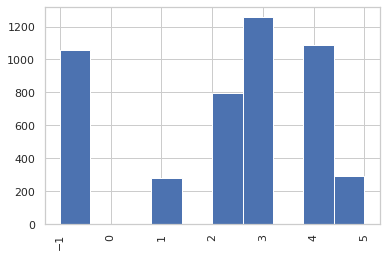

In [350]:
df['Rating.Overall'].hist()
plt.xticks(rotation=90);

The Overal Rating histogram above shows that the greatest number of hospitals have a 3, or average, rating. Over a 1000 hospitals have a 4 rating but almost just as many have no rating.

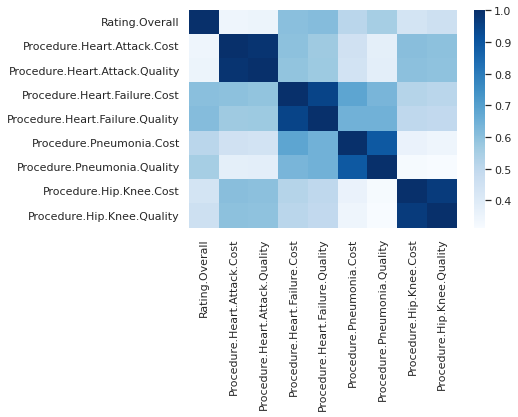

In [351]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues');

In the heat map, I took out annot=True to take out the correlation values as there are too many features and the values overlapped. 

General trends- Procedure.Heart.Failure.Quality and cost has a high correlation with Rating.Morality.

The costs for all 4 procedures tend to be highly correlated with quality and value of that procedure. 

Rating.Readmission has about a 0.7 correlation with Rating.Overall

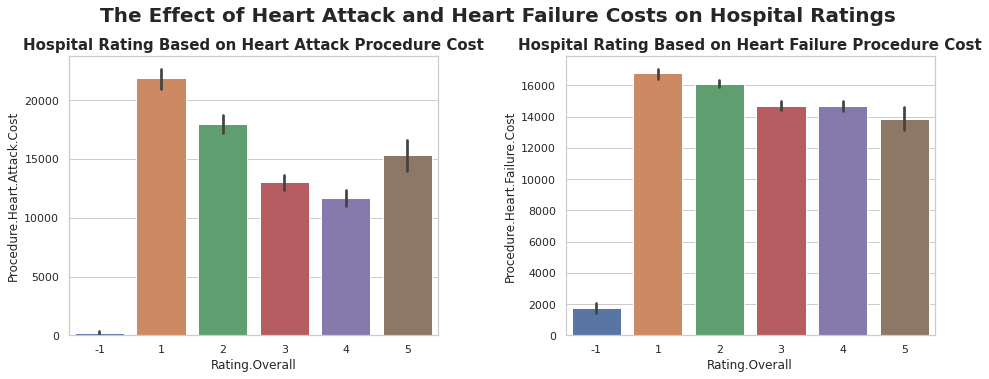

In [352]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Attack.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Heart Attack Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Heart.Failure.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Heart Failure Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Heart Attack and Heart Failure Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

Heart failure costs are slightly higher than heart attack costs at 4 and 3 rated hospitals. Heart attack costs are higher than heart failure costs at 1 rated hospitals. In general, heart failure and heart attack costs decrease the higher the hospital rating.

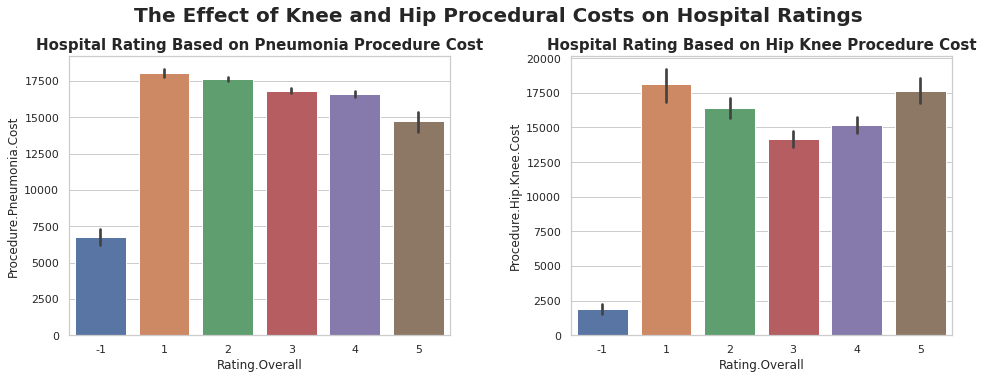

In [353]:
fig, axes = plt.subplots(ncols=2, figsize=(14,5))
sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Pneumonia.Cost', ax=axes[0])
axes[0].set_title('Hospital Rating Based on Pneumonia Procedure Cost', fontsize = 15, fontweight = 'bold')

sns.barplot(data = df, x = 'Rating.Overall', y = 'Procedure.Hip.Knee.Cost', ax=axes[1])
axes[1].set_title('Hospital Rating Based on Hip Knee Procedure Cost', fontsize = 15, fontweight = 'bold')

fig.suptitle('The Effect of Knee and Hip Procedural Costs on Hospital Ratings', fontsize = 20, fontweight = 'bold', y=1.05)
fig.tight_layout()

The trend in the above barplot shows the higher the hospital rating the lower the costs for pneumonia procedures while costs for hip and knee procedures fluctuate more with a average rating of 3 having the least cost.

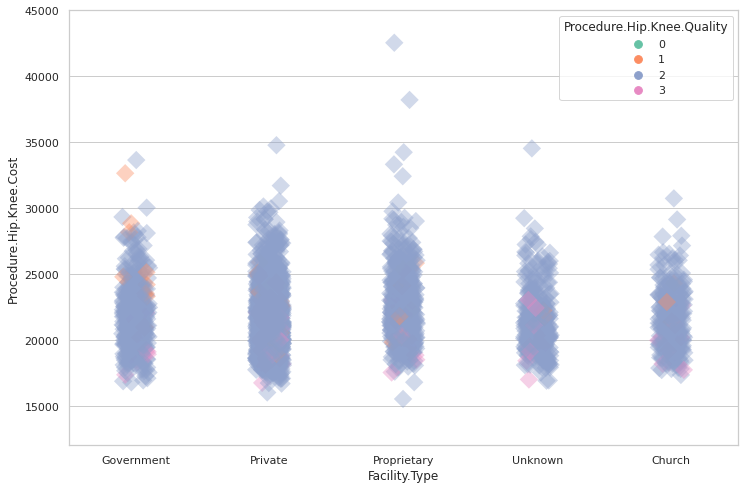

In [354]:
#stripplot
#source: https://www.askpython.com/python-modules/seaborn-stripplot-method
#source: https://stackoverflow.com/questions/40576060/how-to-increase-yaxis-on-seaborn-stripplot
plt.figure(figsize=(12,8))
g= seaborn.stripplot(x="Facility.Type", y="Procedure.Hip.Knee.Cost", hue="Procedure.Hip.Knee.Quality", 
                  data=df, palette="Set2", size=13, marker="D", edgecolor="gray", alpha=.40, jitter=0.10);
g.set_ylim([12000,45000]);

1=below average.
2=average.
3=higher than average.

The above graph is a stripplot of hip and knee procedure costs and the type of facility based on the procedure's quality compared to the national average. Most hospitals no matter the type have a average rating of 2, which is average compared to the national average. There also appears to be a few more 1 rated, or below average rated government hospitals as compared to the others. 